In [1]:
# packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# hide warning messages
import warnings
warnings.filterwarnings("ignore")

In [3]:
# pd.set_option('display.max_columns', None)

In [4]:
# pd.set_option('display.max_rows', None)

In [5]:
# we need to create a date range for the period we have data
business_dates = pd.bdate_range('2005-01-01', '2019-12-31')

In [6]:
# number of stocks in each database
df = pd.DataFrame(
    index=business_dates, 
    columns=['Number of Stocks in Factors Database', 
             'Number of Stocks in TAQ Returns Database', 
             'Number of Match of Both Databases']
    )

In [7]:
for date in business_dates:
    try:
        # converting same way as csv names
        day = str(date)[:4] + str(date)[5:7] + str(date)[8:10]

        # factors dataframe
        factors_path = f'../input/factors/{day}.parquet'
        factors = pd.read_parquet(factors_path)

        df['Number of Stocks in Factors Database'].loc[date] = len(factors)

        # returns dataframe
        returns_path = f'../input/returns/{day}.parquet'
        returns = pd.read_parquet(returns_path)

        df['Number of Stocks in TAQ Returns Database'].loc[date] = len(returns.columns)

        match_tickers = []
        not_match_tickers = []
        
        # separating companies in has its matching or not 
        for permno in factors.index:
            if factors['TAQ_TICKER'].loc[permno] in returns.columns:
                match_tickers.append(factors['TAQ_TICKER'].loc[permno])
            elif factors['TAQ_TICKER'].loc[permno] not in returns.columns:
                not_match_tickers.append(factors['TAQ_TICKER'].loc[permno])

        df['Number of Match of Both Databases'].loc[date] = len(match_tickers)
    except:
        pass

In [8]:
# dropping rows with NaN
df = df.dropna(axis=0)

In [9]:
df.head()

,Number of Stocks in Factors Database,Number of Stocks in TAQ Returns Database,Number of Match of Both Databases
2005-01-03,4770,4643,4608
2005-01-04,4770,4620,4582
2005-01-05,4770,4603,4563
2005-01-06,4769,4576,4540
2005-01-07,4766,4562,4529


In [10]:
# better view of plots
sns.set(rc={'figure.figsize':(10,6)});

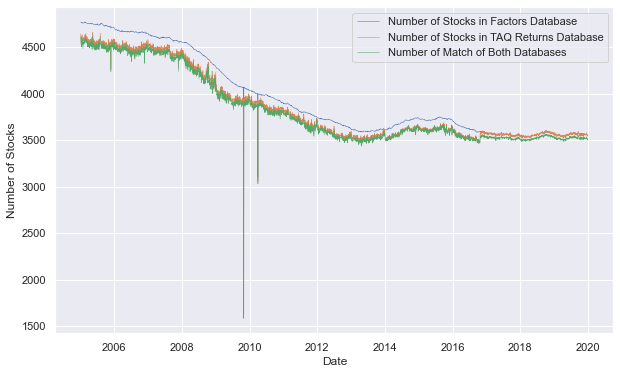

In [11]:
# Series plot
plt.plot(df, label = df.columns, linewidth =.5)
plt.xlabel("Date")
plt.ylabel("Number of Stocks")
plt.xticks(fontname = "Arial")
plt.legend()
plt.show()

In [12]:
# structural break point
index_drop = df[df['Number of Match of Both Databases'] < 3200].index
index_drop

DatetimeIndex(['2009-10-29', '2010-03-30', '2010-03-31'], dtype='datetime64[ns]', freq=None)

In [13]:
df.loc[index_drop]

,Number of Stocks in Factors Database,Number of Stocks in TAQ Returns Database,Number of Match of Both Databases
2009-10-29,1607,1600,1582
2010-03-30,3098,3061,3031
2010-03-31,3099,3057,3029


In [14]:
# dropando these three rows
df = df.drop(index_drop)

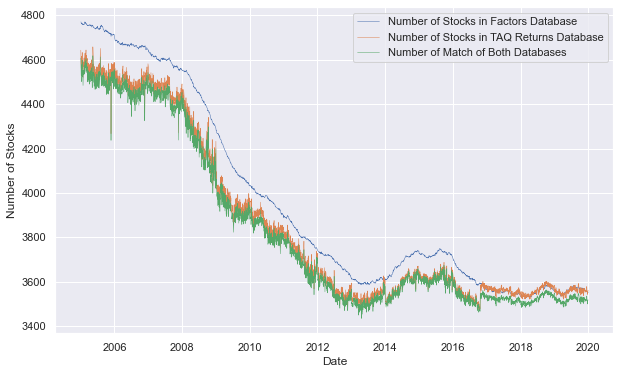

In [15]:
# Series plot
plt.plot(df, label = df.columns, linewidth =.5)
plt.xlabel("Date")
plt.ylabel("Number of Stocks")
plt.xticks(fontname = "Arial")
plt.legend()
# saving picture
# plt.savefig('../output/figures/match1.png')
plt.show()